# `geom_bracket()`

In [1]:
import pandas as pd

from lets_plot import *


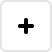
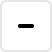
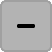
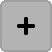
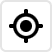
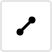
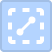
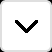
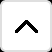
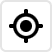
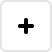
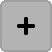
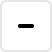
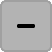
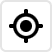
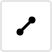
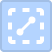
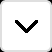
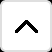
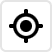

In [2]:
LetsPlot.setup_html()

In [3]:
def dodged_coord(group_id, subgroup_id, subgroups_count, width=.95):
    median = (subgroups_count - 1) / 2
    offset = (subgroup_id - median) * width
    scaler = 1.0 / subgroups_count
    return group_id + offset * scaler

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
p = ggplot(df, aes("drv", "hwy")) + geom_boxplot()
grouped_p = ggplot(df, aes(x="drv", y="hwy")) + geom_boxplot(aes(fill=as_discrete("year")))

## Basic Plot

In [6]:
brackets_data = {
    "xmin": ["f", "f"],
    "xmax": ["4", "r"],
    "y": [46, 48],
    "label": [0.01, 0.02],
    "g": ["A", "B"]
}

bracket_plot = p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data)
bracket_plot

## Brackets Between Groups

In [7]:
brackets_grouped_data = {
    "xmin": [-.2375, 0.7625, 1.7625],
    "xmax": [.2375, 1.2375, 2.2375],
    "y": [46, 30, 28],
    "label": [0.01, 0.02, 0.03],
    "g": ["A", "B", "C"],
}

grouped_p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_grouped_data)

## Remove Label

In [8]:
gggrid([
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y"), data=brackets_data),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, size=0),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, alpha=0, segment_alpha=1),
], ncol=2)

## Aesthetics

In [9]:
def aes_plots(name, const_value, value="g"):
    mapping = dict(xmin="xmin", xmax="xmax", y="y", label="label")
    return [
        p + geom_bracket(aes(**{**mapping, **{name: value}}), data=brackets_data) + ggtitle(f"aes({name}='{value}')"),
        p + geom_bracket(aes(**mapping), data=brackets_data, **{name: const_value}) + ggtitle(f"{name}: {const_value}"),
    ]

In [10]:
gggrid(aes_plots("alpha", .5))

In [11]:
gggrid(aes_plots("color", "green"))

In [12]:
gggrid(aes_plots("size", 5))

In [13]:
gggrid(aes_plots("linetype", 'dotted'))

In [14]:
aes_plots("family", "courier")[1]

In [15]:
aes_plots("fontface", 'bold_italic')[1]

In [16]:
gggrid([
    aes_plots("hjust", 0)[1],
    aes_plots("hjust", .5)[1],
    aes_plots("hjust", 1)[1],
])

In [17]:
gggrid([
    aes_plots("vjust", 0)[1],
    aes_plots("vjust", .5)[1],
    aes_plots("vjust", 1)[1],
])

In [18]:
aes_plots("angle", 30)[1]

In [19]:
gggrid(aes_plots("segment_color", "green"))

In [20]:
gggrid(aes_plots("segment_size", 4))

In [21]:
gggrid(aes_plots("segment_alpha", .5))

In [22]:
gggrid([
    ggplot() + geom_bracket(xmin=-1, xmax=1, label="ABC\nDEF") + ggtitle("Default lineheight"),
    ggplot() + geom_bracket(xmin=-1, xmax=1, label="ABC\nDEF", lineheight=2) + ggtitle("lineheight=2"),
]) + ggtitle("Multiline label")

## Parameters

### Own Parameters

In [23]:
fixed_brackets_data = {
    "xmin": ["f", "f"],
    "xmax": ["4", "r"],
    "y": [46, 46],
    "label": [0.01, 0.02],
    "g": ["A", "B"]
}

gggrid([
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=fixed_brackets_data) + \
        ggtitle("Default plot"),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=fixed_brackets_data, step_increase=3) + \
        ggtitle("step_increase=3"),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=fixed_brackets_data, step_increase=3) + ylim(None, 50) + \
        ggtitle("step_increase=3, ylim()"),
])

### Text Parameters

#### `label_format`

In [24]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, label_format=".2~e")

#### `na_text`

In [25]:
brackets_na_data = {
    "xmin": ["f", "f"],
    "xmax": ["4", "r"],
    "y": [46, 48],
    "label": [0.01, None],
    "g": ["A", "B"]
}

p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_na_data, na_text="None")

#### `nudge_x`/`nudge_y`

In [26]:
gggrid([
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, nudge_x=.5),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, nudge_y=5),
])

#### `size_unit`

In [27]:
gggrid([
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, size=5) + ggtitle("Default size_unit"),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, size=5, size_unit='y') + ggtitle("size_unit='y'"),
]) + ggsize(800, 600)

### Standard Parameters

#### `position`

In [28]:
brackets_grouped_data2 = {
    "xmin": ["f", "f", "f", "f"],
    "xmax": ["4", "4", "r", "r"],
    "y": [50, 50, 56, 56],
    "label": [0.01, 0.03, 0.02, 0.04],
    "year": [1999, 2008, 1999, 2008]
}

gggrid([
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, position=position_nudge(x=.25)) + \
        ggtitle("position_nudge(x=.25)"),
    p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, position=position_nudge(y=-2)) + \
        ggtitle("position_nudge(y=-2)"),
    grouped_p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label", color=as_discrete("year")), data=brackets_grouped_data2, position=position_dodgev()),
], ncol=2)

WARN: The function position_dodgev() is deprecated and will be removed in future releases.


#### `show_legend`

In [29]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label", color="g", size="g", angle="g", linetype="g", segment_alpha="g"),
                 data=brackets_data, show_legend=True)

#### `inherit_aes`

In [30]:
brackets_inherit_data = {
    "xmin": ["f", "f"],
    "xmax": ["4", "r"],
    "y": [46, 48],
    "label": [0.01, 0.02],
    "drv": ["4", "r"]
}

ggplot(df, aes("drv", "hwy", color="drv")) + \
    geom_boxplot() + \
    geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_inherit_data)

#### `manual_key`

In [31]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, color="blue", manual_key="p-value")

#### `sampling`

In [32]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=brackets_data, sampling=sampling_random(1))

#### `color_by`

In [33]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label", paint_a="g"), data=brackets_data, color_by="paint_a")

## Interaction With Other Layers

### Marginal

In [34]:
bracket_plot + ggmarginal("r", layer=geom_histogram())

### Toolbar

In [35]:
bracket_plot + ggtb()

### Facets

In [36]:
grouped_p + \
    geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label", color=as_discrete("year")), data=brackets_grouped_data2) + \
    facet_grid(x="year")

### Coordinate Systems

#### Flip

In [37]:
bracket_plot + coord_flip()

## Tests

In [38]:
tests = [
    {
        'title': "Empty data",
        'data': {
            'xmin': [],
            'xmax': [],
            'y': [],
            'label': [],
        }
    },
    {
        'title': "One element",
        'data': {
            'xmin': [0],
            'xmax': [1],
            'y': [0],
            'label': ["a"],
        }
    },
    {
        'title': "NaN's in data",
        'data': {
            'xmin': [0, None, 0, 0, 0],
            'xmax': [1, 1, None, 1, 1],
            'y': [0, 1, 2, None, 4],
            'label': ["a", "a", "a", "a", None],
        }
    },
]

gggrid([
    ggplot(t['data']) + \
        geom_bracket(aes(xmin='xmin', xmax='xmax', y='y', label='label')) + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)